# Import Libraries:-

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression,Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp,chi2_contingency,binomtest,f_oneway

# Data Loading:-

In [14]:
ds=pd.read_csv("E:/NareshiTech/admission_predict.csv")
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
ds=ds.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','LOR ':'LOR','Chance of Admit ':'Chance_of_Admit'})

In [16]:
ds.shape

(500, 9)

- In this data set, We are having total 9 features including serial number and 500 rows.

In [17]:
ds.columns.to_list()

['Serial No.',
 'GRE_Score',
 'TOEFL_Score',
 'University_Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance_of_Admit']

# Columns:-

- **Serial No.:** Its jest serial number only. So, we can igone this column.

- **GRE Score:** Graduate Record Examination, which means GRE, is an important step in the graduate school or business school application process.

- **TOEFL Score:** Test of English as a Foreign Language, which means TOEFL, is an important step in the test for communications language of the applicants.

- **University Rating:** Every University has a its own rating based on pass percentage of the students rating.

- **SOP:** Statement of Purpose, (SOP) is a document that students prepare to demonstrate why they are applying to a specific course at a specific university. SOP aims to comprehend a candidate's background, reasons for choosing a particular career route, and objectives.

- **LOR:** Letter of Recommendation or LOR is a document that provides the admission officers with a comprehensive insight into your suitable candidature, for admission into the concerned University.  It aims to provide a favourable picture of your academic performance, strengths, experiences, achievements, contributions, and skills.

- **CGPA:** Cumulative Grade Point Average, For schools and colleges, CGPA is used to measure the overall academic achievement of a student by awarding A, B, C, D or F grades. CGPA is a calculation of the average grade point obtained in all subjects except in additional subjects as per the study scheme.

- **Research:** The Research column is shown whether person has done the any kind of research or not.

- **Chance of Admit:** This Chance of Admit column is shown whether person will get the admission or not based on above parameters.

In [18]:
ds.count()

Serial No.           500
GRE_Score            500
TOEFL_Score          500
University_Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance_of_Admit      500
dtype: int64

- columns are not having any null values. so, we can good to go.

In [19]:
ds.corr()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


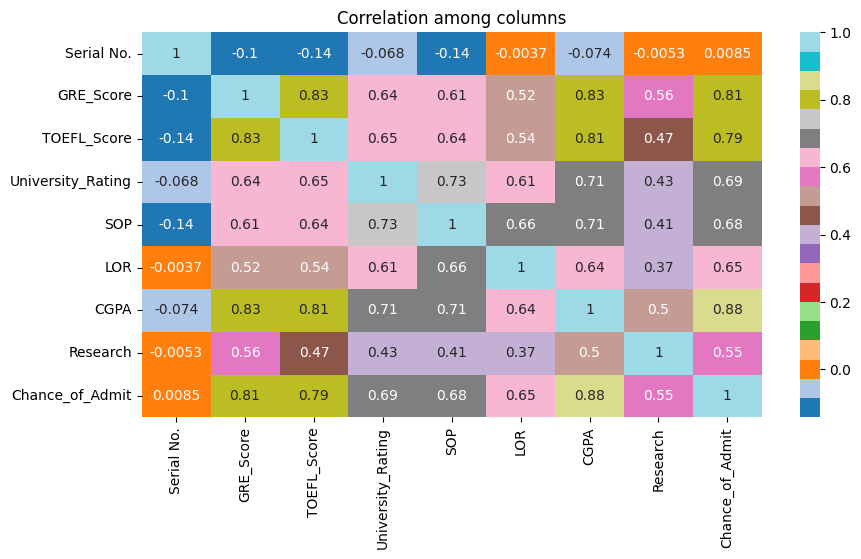

In [84]:
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(data=ds.corr(),cmap='tab20',annot=True,ax=ax)
plt.title("Correlation among columns")
plt.show()

## Correlation between columns:-
### GRE_Score (Graduate Record Examination):-

In [20]:
ds[['GRE_Score','TOEFL_Score']].corr()

,GRE_Score,TOEFL_Score
GRE_Score,1.0000,0.8272
TOEFL_Score,0.8272,1.0000


- GRE & TOEFL scores are having **0.8272%** of correlation between them.

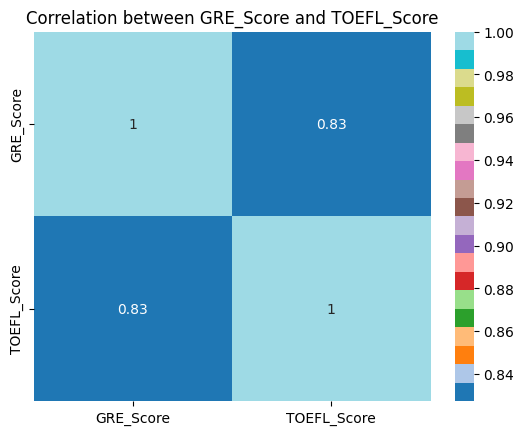

In [30]:
sns.heatmap(data=ds[['GRE_Score','TOEFL_Score']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and TOEFL_Score")
plt.show()

In [21]:
ds[['GRE_Score','University_Rating']].corr()

,GRE_Score,University_Rating
GRE_Score,1.000000,0.635376
University_Rating,0.635376,1.000000


- GRE scores & University Rating are having **0.635376%** of correlation between them.

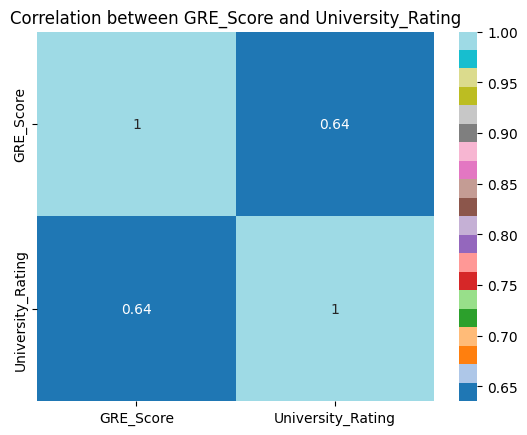

In [31]:
sns.heatmap(data=ds[['GRE_Score','University_Rating']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and University_Rating")
plt.show()

In [22]:
ds[['GRE_Score','SOP']].corr()

,GRE_Score,SOP
GRE_Score,1.000000,0.613498
SOP,0.613498,1.000000


- GRE scores & SOP are having **0.613498%** of correlation between them.

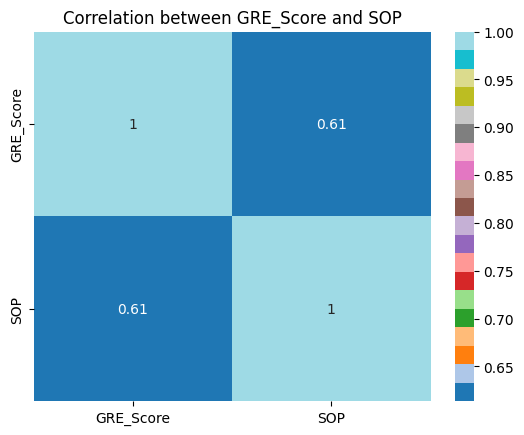

In [32]:
sns.heatmap(data=ds[['GRE_Score','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and SOP")
plt.show()

In [23]:
ds[['GRE_Score','LOR']].corr()

,GRE_Score,LOR
GRE_Score,1.000000,0.524679
LOR,0.524679,1.000000


- GRE scores & LOR are having **0.524679%** of correlation between them.

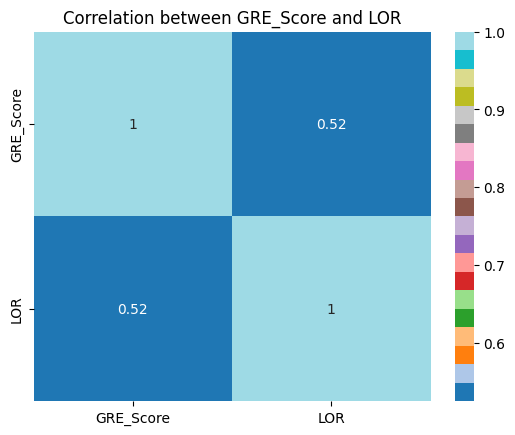

In [37]:
sns.heatmap(data=ds[['GRE_Score','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and LOR")
plt.show()

In [24]:
ds[['GRE_Score','CGPA']].corr()

,GRE_Score,CGPA
GRE_Score,1.000000,0.825878
CGPA,0.825878,1.000000


- GRE scores & CGPA are having **0.825878%** of correlation between them.

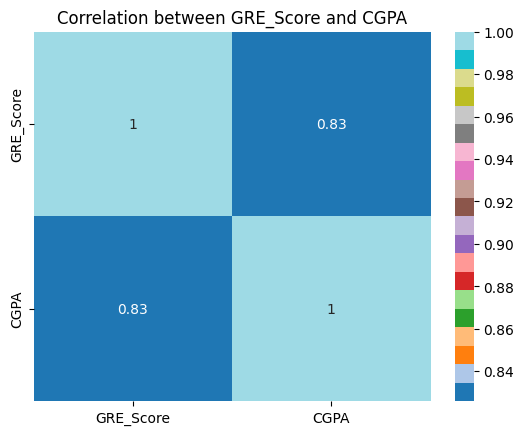

In [38]:
sns.heatmap(data=ds[['GRE_Score','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and CGPA")
plt.show()

In [25]:
ds[['GRE_Score','Research']].corr()

,GRE_Score,Research
GRE_Score,1.000000,0.563398
Research,0.563398,1.000000


- GRE scores & CGPA are having **0.563398%** of correlation between them.

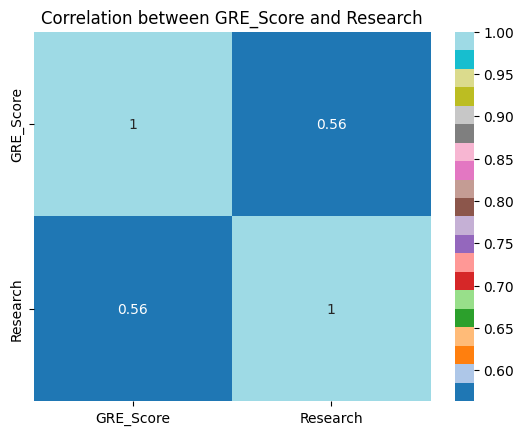

In [39]:
sns.heatmap(data=ds[['GRE_Score','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and Research")
plt.show()

In [26]:
ds[['GRE_Score','Chance_of_Admit']].corr()

,GRE_Score,Chance_of_Admit
GRE_Score,1.000000,0.810351
Chance_of_Admit,0.810351,1.000000


- GRE scores & Chance_of_Admit are having **0.810351%** of correlation between them.

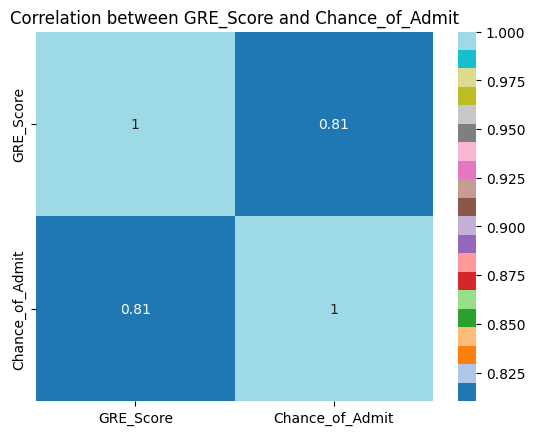

In [40]:
sns.heatmap(data=ds[['GRE_Score','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between GRE_Score and Chance_of_Admit")
plt.show()

- (GRE score & TOEFL score), (GRE score & CGPA score) and (GRE scores & Chance_of_Admit) are having high correlation with respect **0.827% and 0.825% and 0.810351%**.

- GRE scores & LOR are having less correlation with respect **0.524679%**.

### TOEFL_Score (Test of English as a Foreign Language):-

In [27]:
ds.head()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
ds[['TOEFL_Score','University_Rating']].corr()

,TOEFL_Score,University_Rating
TOEFL_Score,1.000000,0.649799
University_Rating,0.649799,1.000000


- TOEFL_Score & University_Rating columns are having **0.649799%** of correlation between them.

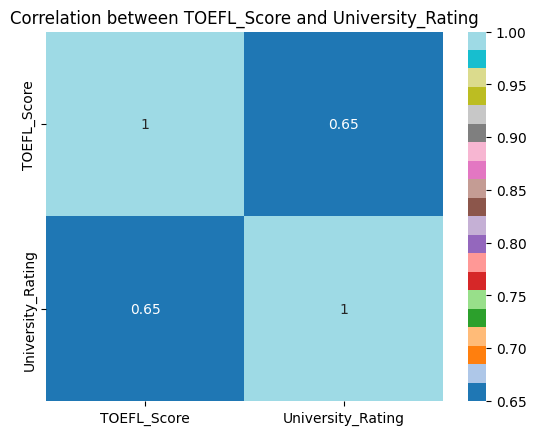

In [41]:
sns.heatmap(data=ds[['TOEFL_Score','University_Rating']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and University_Rating")
plt.show()

In [42]:
ds[['TOEFL_Score','SOP']].corr()

,TOEFL_Score,SOP
TOEFL_Score,1.00000,0.64441
SOP,0.64441,1.00000


- TOEFL_Score & SOP columns are having **0.64441%** of correlation between them.

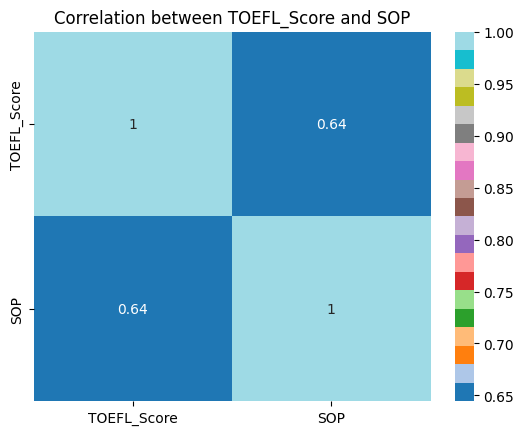

In [43]:
sns.heatmap(data=ds[['TOEFL_Score','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and SOP")
plt.show()

In [44]:
ds[['TOEFL_Score','LOR']].corr()

,TOEFL_Score,LOR
TOEFL_Score,1.000000,0.541563
LOR,0.541563,1.000000


- TOEFL_Score & LOR columns are having **0.541563%** of correlation between them.

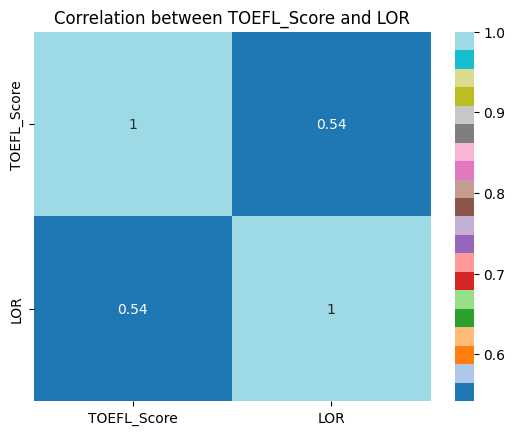

In [45]:
sns.heatmap(data=ds[['TOEFL_Score','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and LOR")
plt.show()

In [46]:
ds[['TOEFL_Score','CGPA']].corr()

,TOEFL_Score,CGPA
TOEFL_Score,1.000000,0.810574
CGPA,0.810574,1.000000


- TOEFL_Score & CGPA columns are having **0.810574%** of correlation between them.

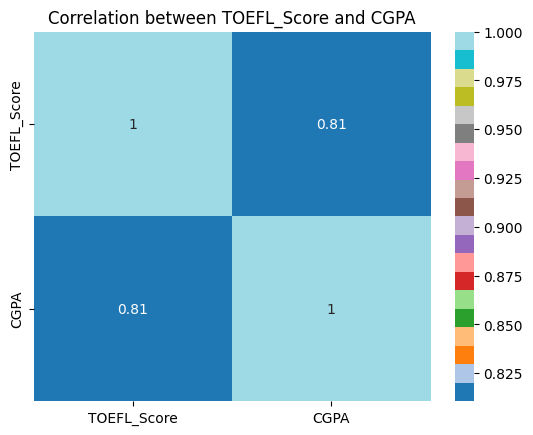

In [47]:
sns.heatmap(data=ds[['TOEFL_Score','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and CGPA")
plt.show()

In [48]:
ds[['TOEFL_Score','Research']].corr()

,TOEFL_Score,Research
TOEFL_Score,1.000000,0.467012
Research,0.467012,1.000000


- TOEFL_Score & Research columns are having **0.467012%** of correlation between them.

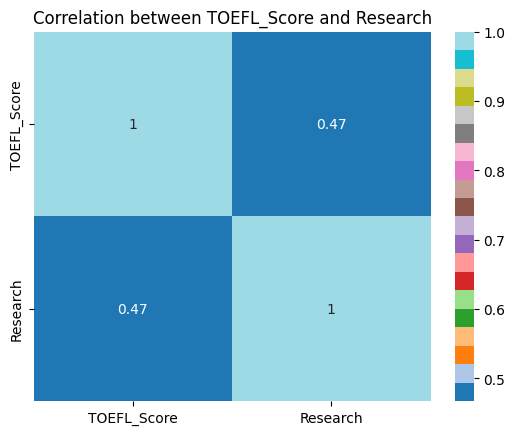

In [49]:
sns.heatmap(data=ds[['TOEFL_Score','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and Research")
plt.show()

In [50]:
ds[['TOEFL_Score','Chance_of_Admit']].corr()

,TOEFL_Score,Chance_of_Admit
TOEFL_Score,1.000000,0.792228
Chance_of_Admit,0.792228,1.000000


- TOEFL_Score & Chance_of_Admit columns are having **0.792228%** of correlation between them.

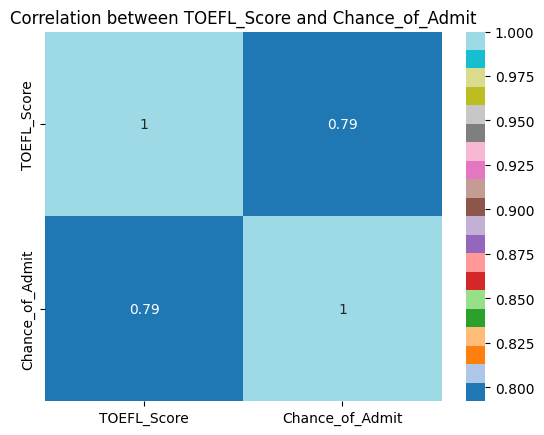

In [51]:
sns.heatmap(data=ds[['TOEFL_Score','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between TOEFL_Score and Chance_of_Admit")
plt.show()

- (TOEFL_Score & CGPA) and (TOEFL_Score & Chance_of_Admit) are having high correlation with respect to the **0.810574% and 0.792228%**.

- TOEFL_Score & Research are having less correlation with respect to the **0.467012%**.

### University_Rating:-

In [52]:
ds[['University_Rating','SOP']].corr()

,University_Rating,SOP
University_Rating,1.000000,0.728024
SOP,0.728024,1.000000


- University_Rating & SOP columns are having **0.728024%** of correlation between them.

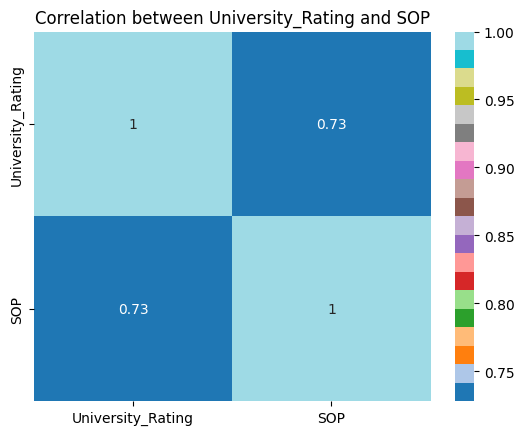

In [53]:
sns.heatmap(data=ds[['University_Rating','SOP']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and SOP")
plt.show()

In [54]:
ds[['University_Rating','LOR']].corr()

,University_Rating,LOR
University_Rating,1.000000,0.608651
LOR,0.608651,1.000000


- University_Rating & LOR columns are having **0.608651%** of correlation between them.

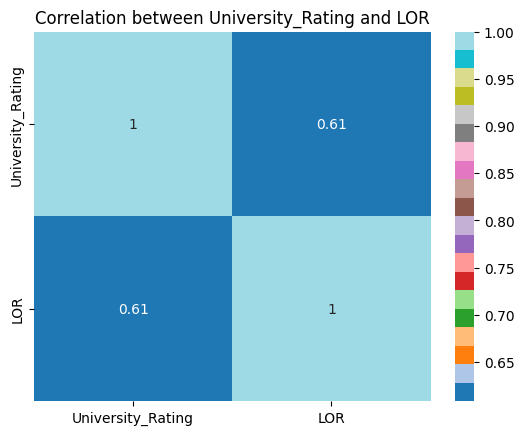

In [55]:
sns.heatmap(data=ds[['University_Rating','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and LOR")
plt.show()

In [56]:
ds[['University_Rating','CGPA']].corr()

,University_Rating,CGPA
University_Rating,1.000000,0.705254
CGPA,0.705254,1.000000


- University_Rating & CGPA columns are having **0.705254%** of correlation between them.

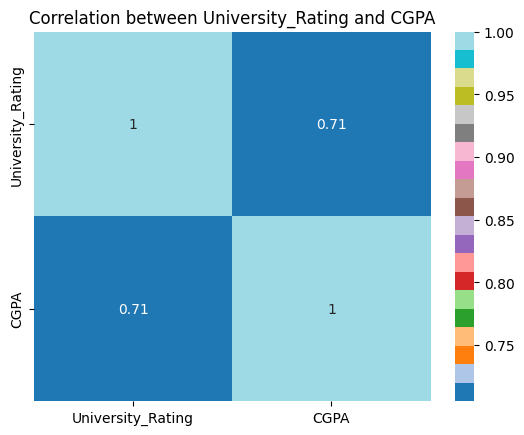

In [57]:
sns.heatmap(data=ds[['University_Rating','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and CGPA")
plt.show()

In [58]:
ds[['University_Rating','Research']].corr()

,University_Rating,Research
University_Rating,1.000000,0.427047
Research,0.427047,1.000000


- University_Rating & Research columns are having **0.427047%** of correlation between them.

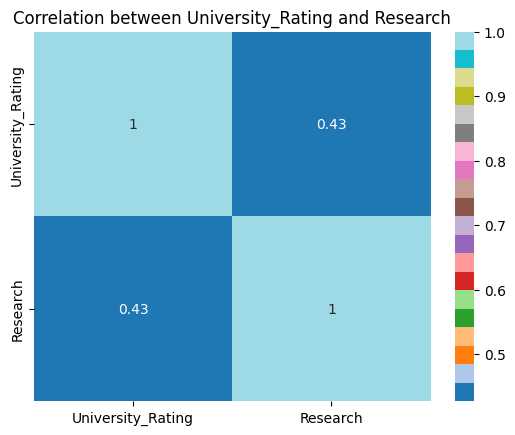

In [59]:
sns.heatmap(data=ds[['University_Rating','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and Research")
plt.show()

In [60]:
ds[['University_Rating','Chance_of_Admit']].corr()

,University_Rating,Chance_of_Admit
University_Rating,1.000000,0.690132
Chance_of_Admit,0.690132,1.000000


- University_Rating & Chance_of_Admit columns are having **0.690132%** of correlation between them.

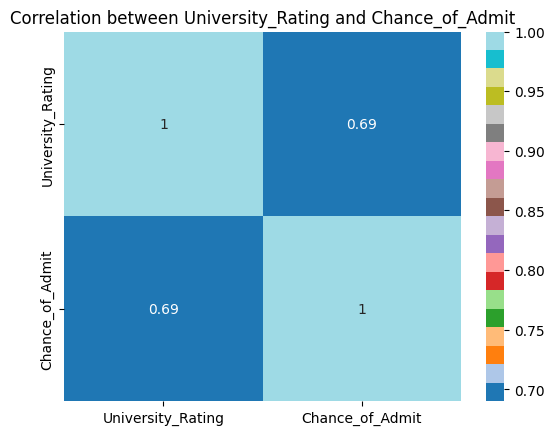

In [61]:
sns.heatmap(data=ds[['University_Rating','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between University_Rating and Chance_of_Admit")
plt.show()

- (University_Rating & SOP) and (University_Rating & CGPA) are having high correlation with respect to the **0.728024% and 0.705254%**.

- University_Rating & Research are having less correlation with respect to the **0.427047%**.

### SOP (Statement of Purpose):-

In [62]:
ds[['SOP','LOR']].corr()

,SOP,LOR
SOP,1.000000,0.663707
LOR,0.663707,1.000000


- SOP & LOR columns are having **0.663707%** of correlation between them.

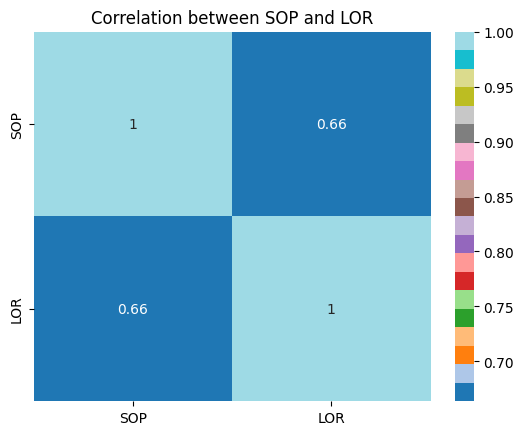

In [63]:
sns.heatmap(data=ds[['SOP','LOR']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and LOR")
plt.show()

In [64]:
ds[['SOP','CGPA']].corr()

,SOP,CGPA
SOP,1.000000,0.712154
CGPA,0.712154,1.000000


- SOP & CGPA columns are having **0.712154%** of correlation between them.

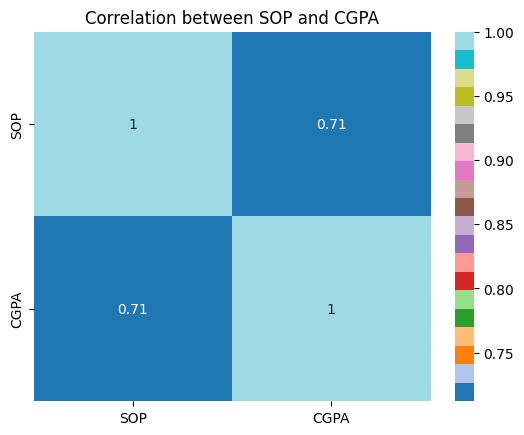

In [65]:
sns.heatmap(data=ds[['SOP','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and CGPA")
plt.show()

In [66]:
ds[['SOP','Research']].corr()

,SOP,Research
SOP,1.000000,0.408116
Research,0.408116,1.000000


- SOP & Research columns are having **0.408116%** of correlation between them.

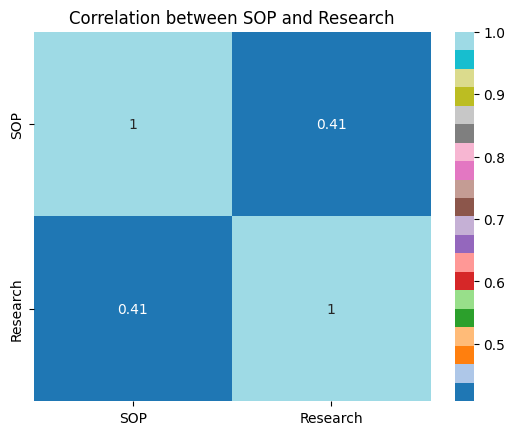

In [67]:
sns.heatmap(data=ds[['SOP','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and Research")
plt.show()

In [68]:
ds[['SOP','Chance_of_Admit']].corr()

,SOP,Chance_of_Admit
SOP,1.000000,0.684137
Chance_of_Admit,0.684137,1.000000


- SOP & Chance_of_Admit columns are having **0.684137%** of correlation between them.

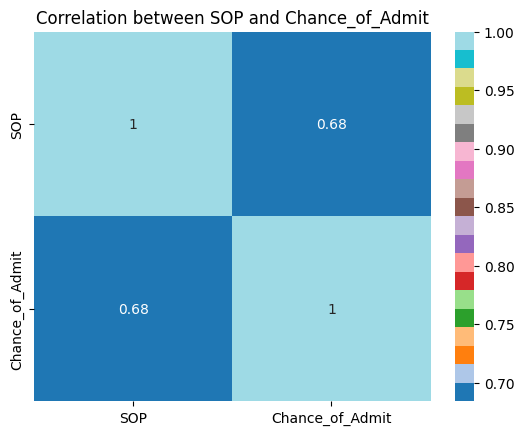

In [69]:
sns.heatmap(data=ds[['SOP','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between SOP and Chance_of_Admit")
plt.show()

- SOP & CGPA are having high correlation with respect to the **0.712154%**.
- SOP & Research are having less correlation with respect to the **0.408116%**.

### LOR (Letter of Recommendation):-

In [70]:
ds[['LOR','CGPA']].corr()

,LOR,CGPA
LOR,1.000000,0.637469
CGPA,0.637469,1.000000


- LOR & CGPA columns are having **0.637469%** of correlation between them.

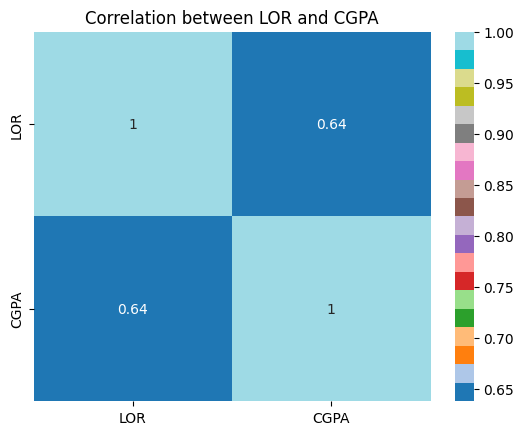

In [72]:
sns.heatmap(data=ds[['LOR','CGPA']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between LOR and CGPA")
plt.show()

In [73]:
ds[['LOR','Research']].corr()

,LOR,Research
LOR,1.000000,0.372526
Research,0.372526,1.000000


- LOR & Research columns are having **0.372526%** of correlation between them.

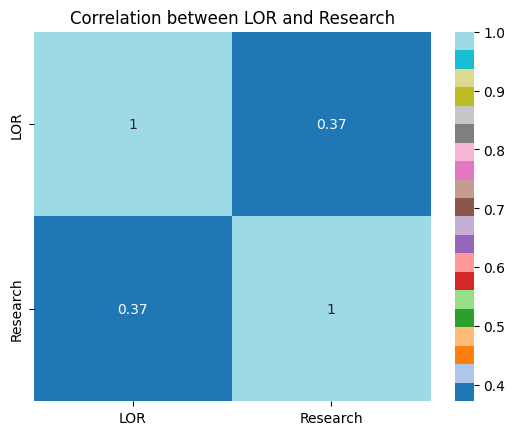

In [74]:
sns.heatmap(data=ds[['LOR','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between LOR and Research")
plt.show()

In [75]:
ds[['LOR','Chance_of_Admit']].corr()

,LOR,Chance_of_Admit
LOR,1.000000,0.645365
Chance_of_Admit,0.645365,1.000000


- LOR & Chance_of_Admit columns are having **0.645365%** of correlation between them.

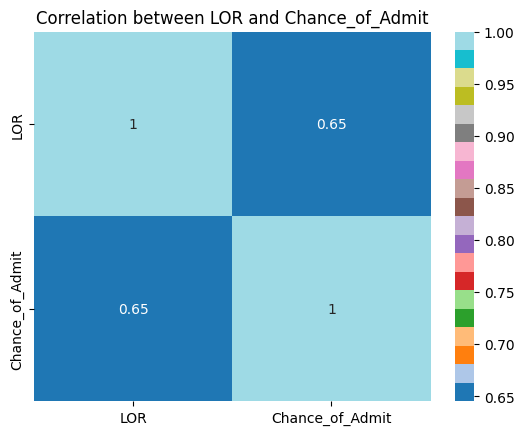

In [76]:
sns.heatmap(data=ds[['LOR','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between LOR and Chance_of_Admit")
plt.show()

### CGPA (Cumulative Grade Point Average):-

In [77]:
ds[['CGPA','Research']].corr()

,CGPA,Research
CGPA,1.000000,0.501311
Research,0.501311,1.000000


- CGPA & Research columns are having **0.501311%** of correlation between them.

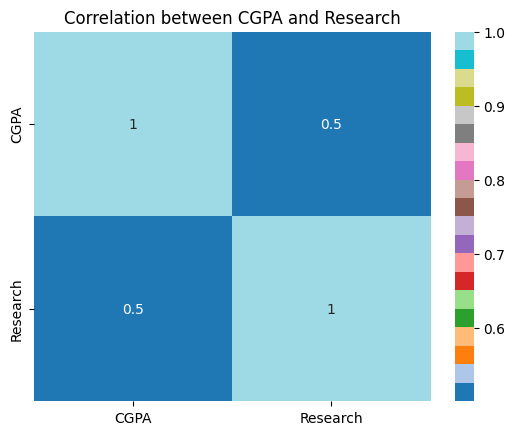

In [78]:
sns.heatmap(data=ds[['CGPA','Research']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between CGPA and Research")
plt.show()

In [79]:
ds[['CGPA','Chance_of_Admit']].corr()

,CGPA,Chance_of_Admit
CGPA,1.000000,0.882413
Chance_of_Admit,0.882413,1.000000


- CGPA & Chance_of_Admit columns are having **0.882413%** of correlation between them.

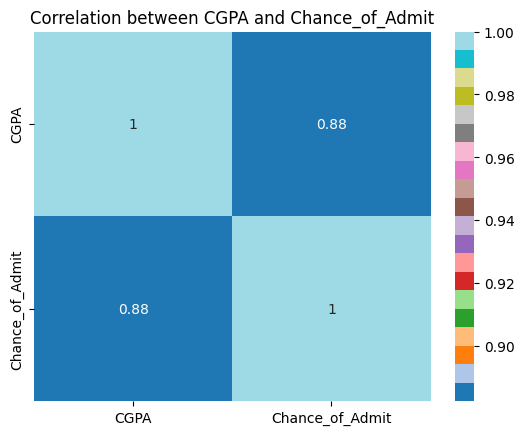

In [80]:
sns.heatmap(data=ds[['CGPA','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between CGPA and Chance_of_Admit")
plt.show()

- CGPA & Chance_of_Admit are having high correlation with respect to the **0.882413%**.
- CGPA & Research are having less correlation with respect to the **0.501311%**.

### Research:-

In [81]:
ds[['Research','Chance_of_Admit']].corr()

,Research,Chance_of_Admit
Research,1.000000,0.545871
Chance_of_Admit,0.545871,1.000000


- Research & Chance_of_Admit columns are having **0.545871%** of correlation between them.

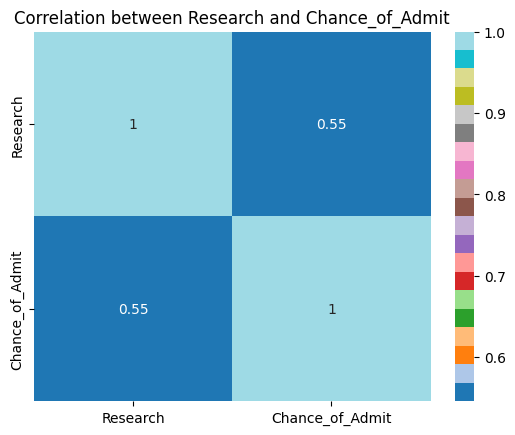

In [82]:
sns.heatmap(data=ds[['Research','Chance_of_Admit']].corr(),cmap='tab20',annot=True)
plt.title("Correlation between Research and Chance_of_Admit")
plt.show()

## EDA:-

In [85]:
ds.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- All columns are having simular values for mean & 50% percentile of the except Research column. might there is a chance of having skewed data in Reseach column.

In [86]:
ds.dtypes

Serial No.             int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

- **GRE_Score,TOEFL_Score,University_Rating,Research** This are columns are having with discrete count values.
- **SOP,LOR,CGPA,Chance_of_Admit** This are columns are having with discrete continuous values.

In [87]:
ds.duplicated().sum()

0

- There is no any duplicated values are presents in this data set.

In [88]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


- In ths data set, we have total 500 row and 9 columns. But we are not going to include serial number column. so, after ignoring serial number column we get 8 columns in this data set.

In [89]:
ds.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

- Non of the column having null values.

In [90]:
ds.std()

Serial No.           144.481833
GRE_Score             11.295148
TOEFL_Score            6.081868
University_Rating      1.143512
SOP                    0.991004
LOR                    0.925450
CGPA                   0.604813
Research               0.496884
Chance_of_Admit        0.141140
dtype: float64

- **Standard deviation is a number that describes how spread out the values are.**
- **A low standard deviation means that most of the numbers are close to the mean (average) value.**
- **A high standard deviation means that the values are spread out over a wider range.**

- GRE_Score column std values are within the range of 11.295148 from the mean, which mean - 316.472000.	
- TOEFL_Score column std values are within the range of 6.081868 from the mean, which mean - 107.192000.
- University_Rating column std values are within the range of 1.143512 from the mean, which mean - 3.114000.
- SOP column std values are within the range of 0.991004 from the mean, which mean - 3.374000.
- LOR column std values are within the range of 0.925450 from the mean, which mean - 3.48400.
- CGPA column std values are within the range of 0.604813 from the mean, which mean - 8.576440.
- Research column std values are within the range of 0.496884 from the mean, which mean - 0.560000.
- Chance_of_Admit column std values are within the range of 0.141140 from the mean, which mean - 0.72174.

In [91]:
ds.skew()

Serial No.           0.000000
GRE_Score           -0.039842
TOEFL_Score          0.095601
University_Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance_of_Admit     -0.289966
dtype: float64

- Skewness seems, for every column elements are symmetrically distributed. 

- The Density plot for GRE_Score seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\2616013650.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['GRE_Score'],ax=ax)


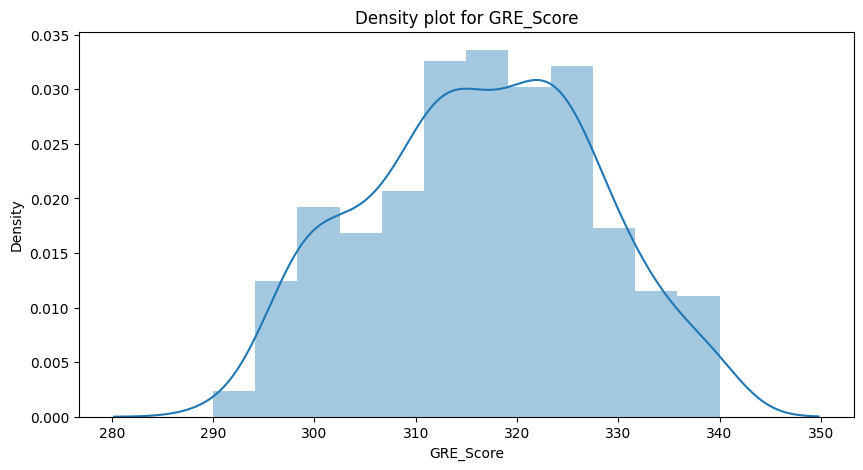

In [100]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['GRE_Score'],ax=ax)
plt.title("Density plot for GRE_Score")
plt.show()

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\3656918755.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['TOEFL_Score'],ax=ax)


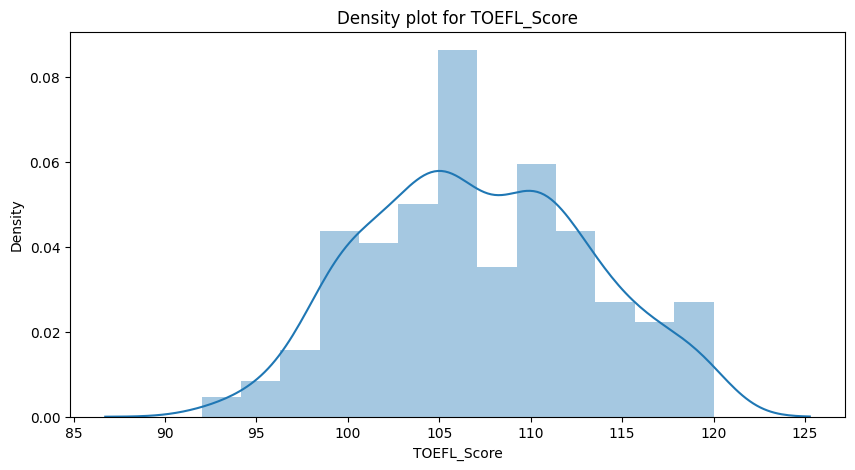

In [101]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['TOEFL_Score'],ax=ax)
plt.title("Density plot for TOEFL_Score")
plt.show()

- The Density plot for TOEFL_Score seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\4197453344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['University_Rating'],ax=ax)


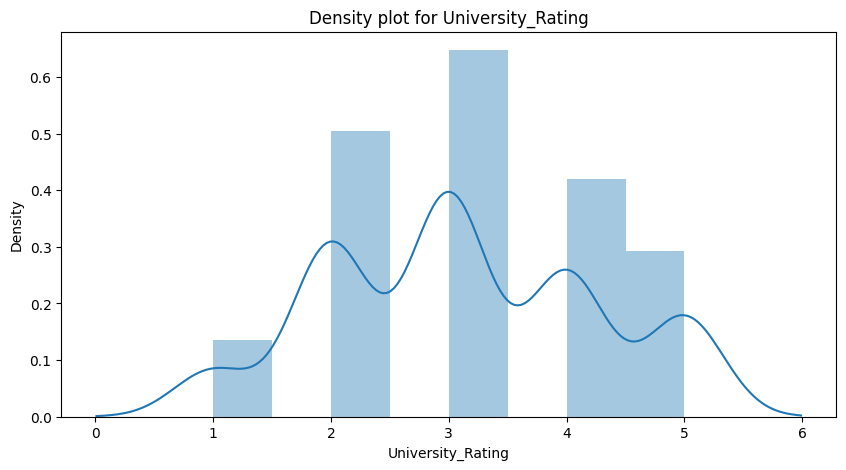

In [102]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['University_Rating'],ax=ax)
plt.title("Density plot for University_Rating")
plt.show()

- The Density plot for University_Rating seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\911174834.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['SOP'],ax=ax)


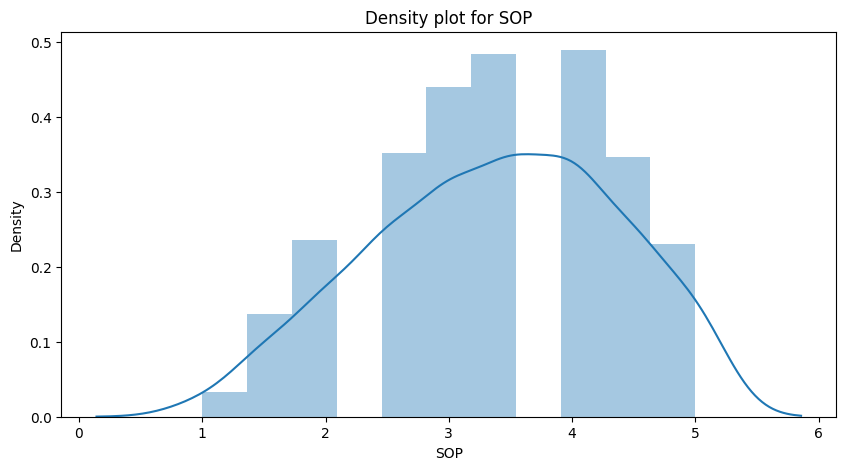

In [103]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['SOP'],ax=ax)
plt.title("Density plot for SOP")
plt.show()

- The Density plot for SOP seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\1859254203.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['LOR'],ax=ax)


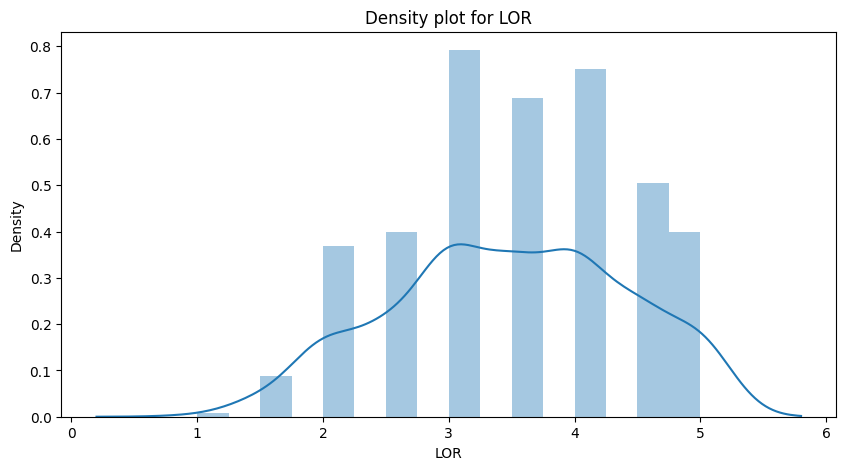

In [104]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['LOR'],ax=ax)
plt.title("Density plot for LOR")
plt.show()

- The Density plot for LOR seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\3598180471.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['CGPA'],ax=ax)


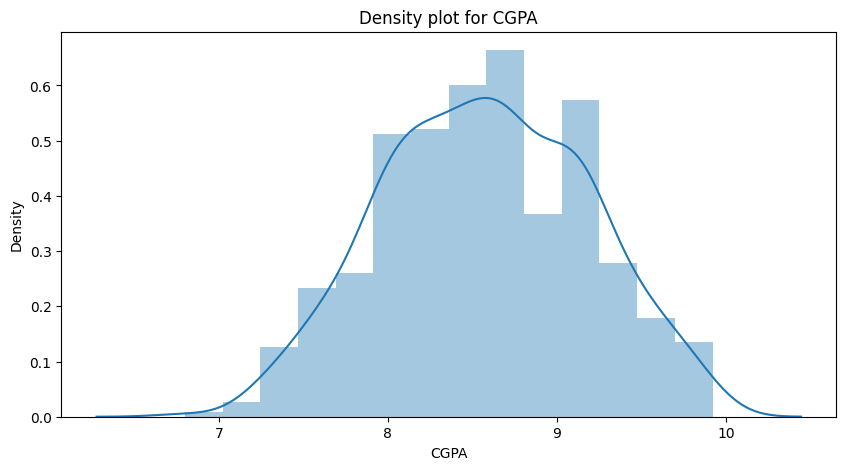

In [105]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['CGPA'],ax=ax)
plt.title("Density plot for CGPA")
plt.show()

- The Density plot for CGPA seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\2841822842.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Research'],ax=ax)


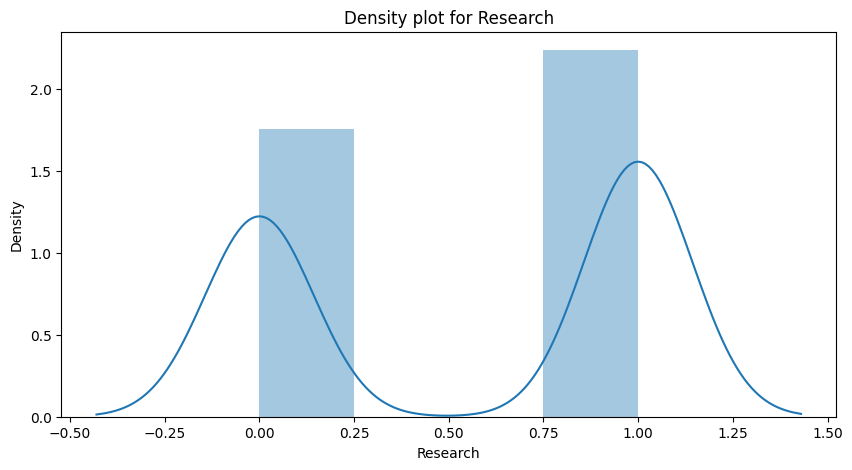

In [106]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['Research'],ax=ax)
plt.title("Density plot for Research")
plt.show()

- The Density plot for Research seems to be symmetric distribution.

C:\Users\manoj\AppData\Local\Temp\ipykernel_12216\2584046887.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['Chance_of_Admit'],ax=ax)


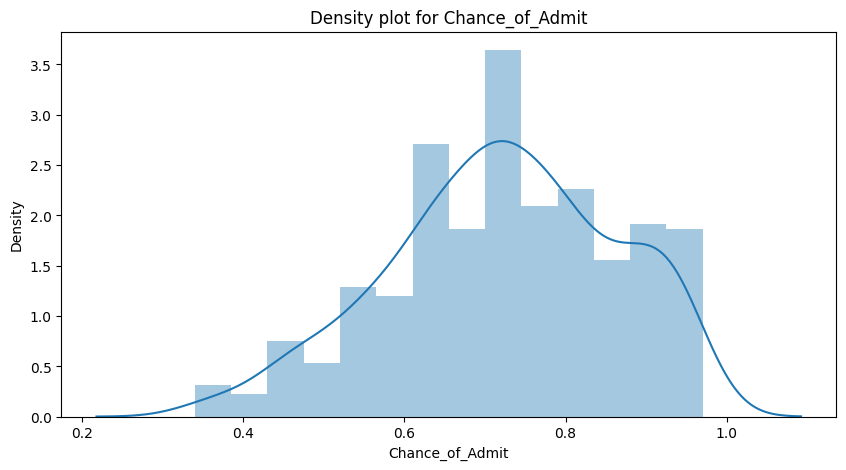

In [107]:
fir,ax=plt.subplots(figsize=(10,5))
sns.distplot(ds['Chance_of_Admit'],ax=ax)
plt.title("Density plot for Chance_of_Admit")
plt.show()

- The Density plot for Chance_of_Admit seems to be small skewed distribution.